In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [3]:
data = pd.read_excel(r"C:\Users\柠檬\Desktop\实验2\1 第4章 数据特征的描述.xlsx",sheet_name=1)
data

,学生编号,月消费支出额（元）
0,1,410
1,2,350
2,3,466
3,4,385
4,5,500
...,...,...
105,106,811
106,107,1109
107,108,1276
108,109,745


# 第一题

## 算术平均数

In [4]:
average = data['月消费支出额（元）'].mean()
average

597.0181818181818

## 调和平均数

In [5]:
data1 = pd.read_excel(r"C:\Users\柠檬\Desktop\实验2\1 第4章 数据特征的描述.xlsx",sheet_name=0)
hmean = stats.hmean(data1['单价'])
hmean

2.2737642585551328

## 中位数

In [6]:
median = np.median(data['月消费支出额（元）'])
median

562.0

## 众数

In [7]:
mode = stats.mode(data['月消费支出额（元）'])[0][0]
mode

520

## 几何平均数

In [8]:
gmean= stats.gmean(data['月消费支出额（元）'])
gmean

579.0721701196758

## 加权调和平均数

In [9]:
data2 = pd.read_excel(r"C:\Users\柠檬\Desktop\实验2\1 第4章 数据特征的描述.xlsx",sheet_name=2)
weighted_harmonic_mean = 0
x = data2['购买金额（元）']/data2['单价']
weighted_harmonic_mean += x.sum()
# print(weighted_harmonic_mean)
weighted_harmonic_mean = data2['购买金额（元）'].sum()/weighted_harmonic_mean
weighted_harmonic_mean

2.3144351464435147

# 第二题

## 最大值

In [10]:
Max = np.max(data['月消费支出额（元）'])
Max

1276

## 最小值

In [11]:
Min = np.min(data['月消费支出额（元）'])
Min

347

## 四分位点

In [12]:
quartile = np.percentile(data['月消费支出额（元）'], (25, 50, 75), interpolation='midpoint')
quartile

array([497.5, 562. , 673. ])

## 样本标准差

In [13]:
standard_deviation = np.std(data['月消费支出额（元）'], ddof=1)
standard_deviation

156.96291748229515

## 峰度系数

In [14]:
kurtosis_coefficient = data['月消费支出额（元）'].kurt()
kurtosis_coefficient

3.0365767586677097

## 偏态系数

In [15]:
skewness_coefficient = data['月消费支出额（元）'].skew()
skewness_coefficient

1.3732950318171815

# 第三题

In [16]:
df = pd.read_excel(r"C:\Users\柠檬\Desktop\实验2\2 descriptive stats.xlsx")
df

,Date,Cakes,Pies,Cookies,Smoothies,Coffee
0,2013-01-01,79,46,518,60,233
1,2013-01-02,91,50,539,161,427
2,2013-01-03,47,60,222,166,347
3,2013-01-04,89,64,734,153,358
4,2013-01-05,112,73,764,240,392
...,...,...,...,...,...,...
1090,2015-12-27,136,49,700,265,483
1091,2015-12-28,77,45,605,69,408
1092,2015-12-29,93,56,508,185,452
1093,2015-12-30,62,28,458,141,356


## Cookies日销售量绘图如下

<BarContainer object of 1095 artists>

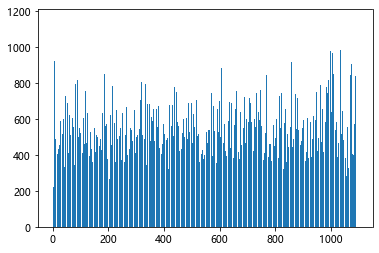

In [17]:
plt.bar(range(1,1096),df['Cookies'])

## 计算偏态系数如下

In [18]:
skewness_coefficient_cookies = df['Cookies'].skew()
skewness_coefficient_cookies

0.4402865556120628

## 计算算术平均数、众数、中位数

In [19]:
average_cookies = df['Cookies'].mean()
print("算数平均数：",average_cookies)
mode_cookies = stats.mode(df['Cookies'])[0][0]
print("众数：",mode_cookies)
median_cookies = np.median(df['Cookies'])
print("中位数：",median_cookies)

算数平均数： 540.4511415525114
众数： 397
中位数： 533.0


观察得出：
1. 算数平均数大于 众数和中位数
2. 由偏态系数大于0

综上得出结论：Cookies的数据是呈右偏分布（正偏分布）

# 第四题

## 计算沙冰（Smoothies）的加权平均数

In [20]:
average_smoothies = df['Smoothies'].mean()
average_smoothies

218.46666666666667

## 计算沙冰（Smoothies）的标准差

In [21]:
standard_deviation_smoothies = np.std(df['Smoothies'])
standard_deviation_smoothies

74.31697221502316

## 经验法则

In [22]:
l = average_smoothies - 2 * standard_deviation_smoothies
r = average_smoothies + 2 * standard_deviation_smoothies
print(l,r)

69.83272223662036 367.100611096713


根据经验法则，预计在95％的日子中，每天对沙冰（Smoothies）的需求位于69.83272223662036和367.100611096713之间。

## 异常点

In [23]:
abnormal_l = average_smoothies - 3 * standard_deviation_smoothies
abnormal_r = average_smoothies + 3 * standard_deviation_smoothies
print(abnormal_l,abnormal_r)

-4.484249978402801 441.41758331173617


In [24]:
ans = 0
for x in df['Smoothies'].values:
    if x < abnormal_l or x > abnormal_r:
        ans+=1
print("异常点数量：%d" %ans)
print("异常点比例：%f" %(ans/len(df['Smoothies'])))

异常点数量：8
异常点比例：0.007306


沙冰需求是异常点的天数比例为0.007306

# 第五题

## 求出至少售出500个饼干（cookies）的日子

In [25]:
num = []
for x in df['Cookies']:
    if(x >= 500):
        num.append(x)
num

[518,
 539,
 734,
 764,
 922,
 587,
 645,
 568,
 585,
 536,
 533,
 647,
 597,
 590,
 535,
 508,
 731,
 602,
 536,
 518,
 601,
 599,
 730,
 820,
 611,
 549,
 632,
 689,
 612,
 599,
 502,
 551,
 622,
 597,
 679,
 513,
 653,
 674,
 762,
 605,
 527,
 639,
 557,
 718,
 520,
 515,
 793,
 585,
 529,
 528,
 817,
 515,
 519,
 552,
 594,
 522,
 653,
 633,
 599,
 564,
 609,
 632,
 606,
 631,
 685,
 757,
 622,
 635,
 588,
 552,
 530,
 581,
 525,
 740,
 710,
 611,
 568,
 595,
 504,
 521,
 547,
 631,
 612,
 513,
 572,
 601,
 579,
 502,
 609,
 543,
 534,
 844,
 604,
 681,
 632,
 791,
 590,
 504,
 546,
 848,
 550,
 885,
 562,
 572,
 580,
 561,
 564,
 611,
 613,
 816,
 629,
 556,
 640,
 621,
 523,
 506,
 520,
 507,
 785,
 586,
 576,
 752,
 503,
 608,
 650,
 639,
 551,
 548,
 505,
 522,
 617,
 507,
 547,
 549,
 693,
 522,
 691,
 633,
 539,
 603,
 626,
 725,
 509,
 665,
 647,
 598,
 702,
 506,
 504,
 528,
 743,
 777,
 796,
 551,
 633,
 507,
 539,
 675,
 624,
 726,
 601,
 688,
 630,
 648,
 596,
 514,
 564

## 求中位数

In [26]:
median_upper = np.median(num)
median_upper

600.0

在每天至少售出500个饼干（cookies）的日子中蛋糕销售的中位数为600个